## 1 - Exploratory Data Analysis

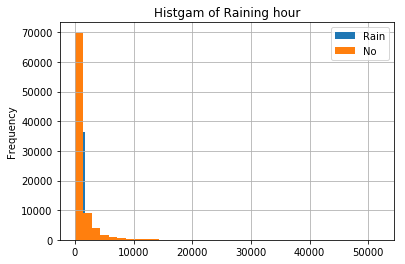

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

turnstile_weather = pd.read_csv("turnstile_data_master_with_weather.csv")

def entries_histogram(turnstile_weather):
    '''
    Before we perform any analysis, it might be useful to take a
    look at the data we're hoping to analyze. More specifically, let's 
    examine the hourly entries in our NYC subway data and determine what
    distribution the data follows. This data is stored in a dataframe
    called turnstile_weather under the ['ENTRIESn_hourly'] column.
    
    Let's plot two histograms on the same axes to show hourly
    entries when raining vs. when not raining. Here's an example on how
    to plot histograms with pandas and matplotlib:
    turnstile_weather['column_to_graph'].hist()
    
    Your histogram may look similar to bar graph in the instructor notes below.
    
    You can read a bit about using matplotlib and pandas to plot histograms here:
    http://pandas.pydata.org/pandas-docs/stable/visualization.html#histograms
    
    You can see the information contained within the turnstile weather data here:
    https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv
    '''
    
    plt.figure()
    turnstile_weather['ENTRIESn_hourly'].loc[turnstile_weather['rain'] == 1].plot.hist(bins=30) # your code here to plot a historgram for hourly entries when it is raining
    turnstile_weather['ENTRIESn_hourly'].loc[turnstile_weather['rain'] == 0].plot.hist(bins=30) # your code here to plot a historgram for hourly entries when it is not raining
    plt.title("Histgam of Raining hour")
    plt.legend(['Rain', 'No'])
    plt.grid(True)
    return plt

plot = entries_histogram(turnstile_weather)

## 2 - Welch's t-Test?

![title](img/Quiz 2 Welch's t Test Ans.png)

## 3 - Mann-Whitney U-Test

In [3]:
import numpy as np
import scipy
import scipy.stats
import pandas as pd

turnstile_weather = pd.read_csv("turnstile_data_master_with_weather.csv")

def mann_whitney_plus_means(turnstile_weather):
    '''
    This function will consume the turnstile_weather dataframe containing
    our final turnstile weather data. 
    
    You will want to take the means and run the Mann Whitney U-test on the 
    ENTRIESn_hourly column in the turnstile_weather dataframe.
    
    This function should return:
        1) the mean of entries with rain
        2) the mean of entries without rain
        3) the Mann-Whitney U-statistic and p-value comparing the number of entries
           with rain and the number of entries without rain
    
    You should feel free to use scipy's Mann-Whitney implementation, and you 
    might also find it useful to use numpy's mean function.
    
    Here are the functions' documentation:
    http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html
    
    You can look at the final turnstile weather data at the link below:
    https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv
    '''
    ### YOUR CODE HERE ###
    rain_data = turnstile_weather['ENTRIESn_hourly'].loc[turnstile_weather['rain'] == 1]
    no_rain_data = turnstile_weather['ENTRIESn_hourly'].loc[turnstile_weather['rain'] == 0]
    with_rain_mean = np.mean(rain_data)
    without_rain_mean = np.mean(no_rain_data) 
    U, p = scipy.stats.mannwhitneyu(rain_data,no_rain_data, alternative = 'greater')
    
    return with_rain_mean, without_rain_mean, U, p
                                                         
with_rain_mean, without_rain_mean, U, p  = mann_whitney_plus_means(turnstile_weather)
print("Rain mean hour", with_rain_mean) 
print("No Rain mean hour", without_rain_mean)
if p <= 0.05:
    print("P value :", p, " reject null hypothsis : the mean hours with rain and no rain are different ")
else:
    print("P value :", p, " don't reject null hypothsis : the mean hours with rain and no rain are the same ")

Rain mean hour 1105.44637675
No Rain mean hour 1090.27878015
P value : 0.0249403922945  reject null hypothsis : the mean hours with rain and no rain are different 


## 4 - Ridership on Rainy vs. Nonrainy Days

![title](img/Quiz 4 Ridership on Rainy vs. Nonrainy Days Ans.png )

## 5 - Linear Regression

In [3]:
import numpy as np
import pandas as pd
# from ggplot import *

"""
In this question, you need to:
1) implement the compute_cost() and gradient_descent() procedures
2) Select features (in the predictions procedure) and make predictions.

"""
turnstile_weather = pd.read_csv("turnstile_data_master_with_weather.csv")


def normalize_features(df):
    """
    Normalize the features in the data set.
    """
    mu = df.mean()
    sigma = df.std()
    
    if (sigma == 0).any():
        raise Exception("One or more features had the same value for all samples, and thus could " + \
                         "not be normalized. Please do not include features with only a single value " + \
                         "in your model.")
    df_normalized = (df - df.mean()) / df.std()

    return df_normalized, mu, sigma

def compute_cost(features, values, theta):
    """
    Compute the cost function given a set of features / values, 
    and the values for our thetas.
    
    This can be the same code as the compute_cost function in the lesson #3 exercises,
    but feel free to implement your own.
    """
    
    # your code here
    m = len(features)
    Sum_Of_Square_Error = np.square(np.dot(features,theta ) - values).sum()
    cost = Sum_Of_Square_Error / (2 * m)
    
    return cost

def gradient_descent(features, values, theta, alpha, num_iterations):
    """
    Perform gradient descent given a data set with an arbitrary number of features.
    
    This can be the same gradient descent code as in the lesson #3 exercises,
    but feel free to implement your own.
    """
    
    m = len(values)
    cost_history = []

    for i in range(num_iterations):
        prediction = values - np.dot(features, theta )
        theta = theta + alpha/m * np.dot(prediction,features )
        cost = compute_cost(features, values, theta)
        cost_history.append(cost)
        
    return theta, pandas.Series(cost_history)

def predictions(dataframe):
    '''
    The NYC turnstile data is stored in a pandas dataframe called weather_turnstile.
    Using the information stored in the dataframe, let's predict the ridership of
    the NYC subway using linear regression with gradient descent.
    
    You can download the complete turnstile weather dataframe here:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv    
    
    Your prediction should have a R^2 value of 0.40 or better.
    You need to experiment using various input features contained in the dataframe. 
    We recommend that you don't use the EXITSn_hourly feature as an input to the 
    linear model because we cannot use it as a predictor: we cannot use exits 
    counts as a way to predict entry counts. 
    
    Note: Due to the memory and CPU limitation of our Amazon EC2 instance, we will
    give you a random subet (~15%) of the data contained in 
    turnstile_data_master_with_weather.csv. You are encouraged to experiment with 
    this computer on your own computer, locally. 
    
    
    If you'd like to view a plot of your cost history, uncomment the call to 
    plot_cost_history below. The slowdown from plotting is significant, so if you 
    are timing out, the first thing to do is to comment out the plot command again.
    
    If you receive a "server has encountered an error" message, that means you are 
    hitting the 30-second limit that's placed on running your program. Try using a 
    smaller number for num_iterations if that's the case.
    
    If you are using your own algorithm/models, see if you can optimize your code so 
    that it runs faster.
    '''
    # Select Features (try different features!)
    features = dataframe[['rain', 'precipi', 'Hour', 'meantempi']]
    
    # Add UNIT to features using dummy variables
    dummy_units = pandas.get_dummies(dataframe['UNIT'], prefix='unit')
    features = features.join(dummy_units)
    
    # Values
    values = dataframe['ENTRIESn_hourly']
    m = len(values)

    features, mu, sigma = normalize_features(features)
    features['ones'] = np.ones(m) # Add a column of 1s (y intercept)
    
    # Convert features and values to numpy arrays
    features_array = np.array(features)
    values_array = np.array(values)

    # Set values for alpha, number of iterations.
    alpha = 0.1 # please feel free to change this value
    num_iterations = 75 # please feel free to change this value

    # Initialize theta, perform gradient descent
    theta_gradient_descent = np.zeros(len(features.columns))
    theta_gradient_descent, cost_history = gradient_descent(features_array, 
                                                            values_array, 
                                                            theta_gradient_descent, 
                                                            alpha, 
                                                            num_iterations)
    
    plot = None
    # -------------------------------------------------
    # Uncomment the next line to see your cost history
    # -------------------------------------------------
#     plot = plot_cost_history(alpha, cost_history)
    # 
    # Please note, there is a possibility that plotting
    # this in addition to your calculation will exceed 
    # the 30 second limit on the compute servers.
    
    predictions = np.dot(features_array, theta_gradient_descent)
    return predictions, plot


# def plot_cost_history(alpha, cost_history):
#    """This function is for viewing the plot of your cost history.
#    You can run it by uncommenting this

#        plot_cost_history(alpha, cost_history) 

#    call in predictions.
   
#    If you want to run this locally, you should print the return value
#    from this function.
#    """
#    cost_df = pandas.DataFrame({
#       'Cost_History': cost_history,
#       'Iteration': range(len(cost_history))
#    })
#    return ggplot(cost_df, aes('Iteration', 'Cost_History')) + \
#       geom_point() + ggtitle('Cost History for alpha = %.3f' % alpha )


predictions, plot = predictions(turnstile_weather)

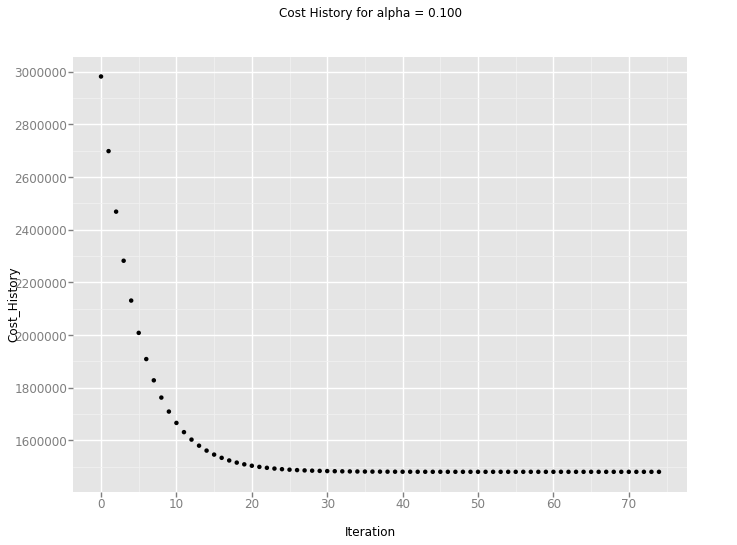

<ggplot: (290066405)>

In [5]:
plot

## 6 - Plotting Residuals

In [10]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

turnstile_weather = pd.read_csv("turnstile_data_master_with_weather.csv")

def plot_residuals(turnstile_weather, predictions):
    '''
    Using the same methods that we used to plot a histogram of entries
    per hour for our data, why don't you make a histogram of the residuals
    (that is, the difference between the original hourly entry data and the predicted values).
    Try different binwidths for your histogram.

    Based on this residual histogram, do you have any insight into how our model
    performed?  Reading a bit on this webpage might be useful:

    http://www.itl.nist.gov/div898/handbook/pri/section2/pri24.htm
    '''
   
    plt.figure()
    (turnstile_weather['ENTRIESn_hourly'] - predictions).hist()
    return plt

Residual_Plot = plot_residuals(turnstile_weather, predictions)

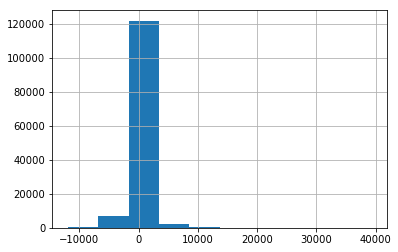

In [12]:
Residual_Plot.show()

## 7 - Compute R^2

In [16]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sys

def compute_r_squared(data, predictions):
    '''
    In exercise 5, we calculated the R^2 value for you. But why don't you try and
    and calculate the R^2 value yourself.
    
    Given a list of original data points, and also a list of predicted data points,
    write a function that will compute and return the coefficient of determination (R^2)
    for this data.  numpy.mean() and numpy.sum() might both be useful here, but
    not necessary.

    Documentation about numpy.mean() and numpy.sum() below:
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html
    '''
    SST = ((data - np.mean(data))**2).sum()
    SSReg = ((data - predictions)**2).sum()
    r_squared = 1 - SSReg/SST
    
    return r_squared

data = turnstile_weather['ENTRIESn_hourly']
Subway_r_squared = compute_r_squared(data, predictions)
print('Subway_r_squared: ',Subway_r_squared)

Subway_r_squared:  0.4580443140394266


## 8 - More Linear Regression (Optional)

In [36]:
# -*- coding: utf-8 -*-

import numpy as np
import pandas
import scipy
import statsmodels.api as sm

"""
In this optional exercise, you should complete the function called 
predictions(turnstile_weather). This function takes in our pandas 
turnstile weather dataframe, and returns a set of predicted ridership values,
based on the other information in the dataframe.  

In exercise 3.5 we used Gradient Descent in order to compute the coefficients
theta used for the ridership prediction. Here you should attempt to implement 
another way of computing the coeffcients theta. You may also try using a reference implementation such as: 
http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.OLS.html

One of the advantages of the statsmodels implementation is that it gives you
easy access to the values of the coefficients theta. This can help you infer relationships 
between variables in the dataset.

You may also experiment with polynomial terms as part of the input variables.  

The following links might be useful: 
http://en.wikipedia.org/wiki/Ordinary_least_squares
http://en.wikipedia.org/w/index.php?title=Linear_least_squares_(mathematics)
http://en.wikipedia.org/wiki/Polynomial_regression

This is your playground. Go wild!

How does your choice of linear regression compare to linear regression
with gradient descent computed in Exercise 3.5?

You can look at the information contained in the turnstile_weather dataframe below:
https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv

Note: due to the memory and CPU limitation of our amazon EC2 instance, we will
give you a random subset (~10%) of the data contained in turnstile_data_master_with_weather.csv

If you receive a "server has encountered an error" message, that means you are hitting 
the 30 second limit that's placed on running your program. See if you can optimize your code so it
runs faster.
"""
def normalize_features(df):
    """
    Normalize the features in the data set.
    """
    mu = df.mean()
    sigma = df.std()
    
    if (sigma == 0).any():
        raise Exception("One or more features had the same value for all samples, and thus could " + \
                         "not be normalized. Please do not include features with only a single value " + \
                         "in your model.")
    df_normalized = (df - df.mean()) / df.std()

    return df_normalized, mu, sigma

def predictions(weather_turnstile):
    # dataset
    featureName = ['Hour','maxpressurei','maxdewpti','mindewpti','minpressurei','meanpressurei']
    Y = weather_turnstile['ENTRIESn_hourly']
    X = sm.add_constant(weather_turnstile[featureName])
    
    # initialize the X features ==> add dummy units, standardize, and add constant
    dummy_units = pd.get_dummies(weather_turnstile['UNIT'], prefix='unit')
    X = weather_turnstile[featureName].join(dummy_units)
    X, mu, sigma = normalize_features(X)
    X = sm.add_constant(X)
    
#     print('X:', X.head(5))
    # model fitting
    model = sm.OLS(Y,X)
    results = model.fit()
    
    # prediction
    prediction = results.predict(X)
    print('R^2:', results.rsquared)
    model_summary = results.summary
    
    return prediction, model_summary

weather_turnstile = pd.read_csv("turnstile_data_master_with_weather.csv")
sm_model_prediction,sm_model_summary  = predictions(weather_turnstile)

R^2: 0.459133660513


In [37]:
sm_model_summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ENTRIESn_hourly   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     237.5
Date:                Sat, 17 Jun 2017   Prob (F-statistic):               0.00
Time:                        08:15:31   Log-Likelihood:            -1.1702e+06
No. Observations:              131951   AIC:                         2.341e+06
Df Residuals:                  131480   BIC:                         2.346e+06
Df Model:                         470                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1095.4660      4.774    229.473      0.000    1086.109    1104.823
Hour            464.6533      4.762     97.571      0.000     455.320     473.987
maxpressurei   -122.3773     18.541     -6.600      0.000    -158.718     -86.037
maxdewpti       142.1830     16.129      8.816      0.000     110.571     173.795
mindewpti      -188.4222     15.512    -12.147      0.000    -218.825    -158.020
minpressurei   -144.9395     19.155     -7.567      0.000    -182.482    -107.397
meanpressurei   232.1685     28.960      8.017      0.000     175.407     288.930
unit_R001      1.289e+13   6.23e+13      0.207      0.836   -1.09e+14    1.35e+14
unit_R002      1.279e+13   6.17e+13      0.207      0.836   -1.08e+14    1.34e+14
unit_R003       1.24e+13   5.99e+13      0.207      0.836   -1.05e+14     1.3e+14
unit_R004      1.254e+13   6.06e+13      0.207      0.836   -1.06e+14    1.31e+14
unit_R005      1.251e+13   6.04e+13      0.207      0.836   -1.06e+14    1.31e+14
unit_R006      1.303e+13   6.29e+13      0.207      0.836    -1.1e+14    1.36e+14
unit_R007      1.233e+13   5.95e+13      0.207      0.836   -1.04e+14    1.29e+14
unit_R008      1.211e+13   5.85e+13      0.207      0.836   -1.02e+14    1.27e+14
unit_R009       1.24e+13   5.99e+13      0.207      0.836   -1.05e+14     1.3e+14
unit_R010      1.275e+13   6.16e+13      0.207      0.836   -1.08e+14    1.33e+14
unit_R011      1.327e+13   6.41e+13      0.207      0.836   -1.12e+14    1.39e+14
unit_R012      1.367e+13    6.6e+13      0.207      0.836   -1.16e+14    1.43e+14
unit_R013       1.31e+13   6.32e+13      0.207      0.836   -1.11e+14    1.37e+14
unit_R014      1.303e+13   6.29e+13      0.207      0.836    -1.1e+14    1.36e+14
unit_R015       1.43e+13   6.91e+13      0.207      0.836   -1.21e+14     1.5e+14
unit_R016      1.296e+13   6.26e+13      0.207      0.836    -1.1e+14    1.36e+14
unit_R017        1.3e+13   6.28e+13      0.207      0.836    -1.1e+14    1.36e+14
unit_R018      1.437e+13   6.94e+13      0.207      0.836   -1.22e+14     1.5e+14
unit_R019      1.337e+13   6.45e+13      0.207      0.836   -1.13e+14     1.4e+14
unit_R020       1.36e+13   6.57e+13      0.207      0.836   -1.15e+14    1.42e+14
unit_R021      1.357e+13   6.55e+13      0.207      0.836   -1.15e+14    1.42e+14
unit_R022      1.363e+13   6.58e+13      0.207      0.836   -1.15e+14    1.43e+14
unit_R023      1.317e+13   6.36e+13      0.207      0.836   -1.11e+14    1.38e+14
unit_R024        1.3e+13   6.28e+13      0.207      0.836    -1.1e+14    1.36e+14
unit_R025      1.353e+13   6.53e+13      0.207      0.836   -1.15e+14    1.42e+14
unit_R027      1.323e+13   6.39e+13      0.207      0.836   -1.12e+14    1.38e+14
unit_R028      1.347e+13    6.5e+13      0.207      0.836   -1.14e+14    1.41e+14
unit_R029      1.323e+13   6.39e+13      0.207   